In [175]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz 
import os
import pickle
from matplotlib.font_manager import FontProperties
sns.set(font=['sans-serif'])
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})
# scikit-learn
import sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer, RobustScaler
from sklearn import datasets, linear_model, preprocessing, neighbors
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold,RandomizedSearchCV,validation_curve
from sklearn.metrics import accuracy_score, confusion_matrix,mean_absolute_error,mean_squared_error, r2_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
import xgboost as xgb

## Load predict set

In [200]:
df_oh = pd.read_csv('../台北市_predictset_onehot.csv', engine='python',index_col=[0])
df_oh

,交易年,總樓層數,主要建材,有無管理組織,車位總價元,建物移轉總面積坪,每坪價格,車位,屋齡,房間數,...,交易標的_房地(土地+建物),交易標的_房地(土地+建物)+車位,都市土地使用分區_住,都市土地使用分區_其他,都市土地使用分區_商,建物型態_住宅大樓(11層含以上有電梯),建物型態_公寓(5樓含以下無電梯),建物型態_套房(1房1廳1衛),建物型態_華廈(10層含以下有電梯),建物型態_透天厝
1,4,33,1,1,0.0,34.932700,64.695829,0,1,5,...,1,0,0,0,1,1,0,0,0,0
2,4,10,4,1,0.0,12.405525,48.365547,0,8,2,...,1,0,1,0,0,0,0,1,0,0
3,4,12,4,1,0.0,66.271700,44.061040,1,5,7,...,0,1,1,0,0,1,0,0,0,0
5,4,5,4,1,0.0,69.039575,50.695561,1,7,8,...,0,1,1,0,0,0,0,0,1,0
7,4,12,4,1,0.0,24.293775,50.218626,0,34,4,...,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259317,9,27,1,0,440.0,85.301975,62.483899,2,0,9,...,0,1,1,0,0,1,0,0,0,0
259318,9,27,1,0,420.0,68.113925,57.844266,2,0,7,...,0,1,1,0,0,1,0,0,0,0
259319,9,27,1,0,220.0,58.430900,60.926667,1,0,7,...,0,1,1,0,0,1,0,0,0,0
259320,9,27,1,0,260.0,68.274250,66.935924,1,0,8,...,0,1,1,0,0,1,0,0,0,0


C:\Python\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

C:\Python\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


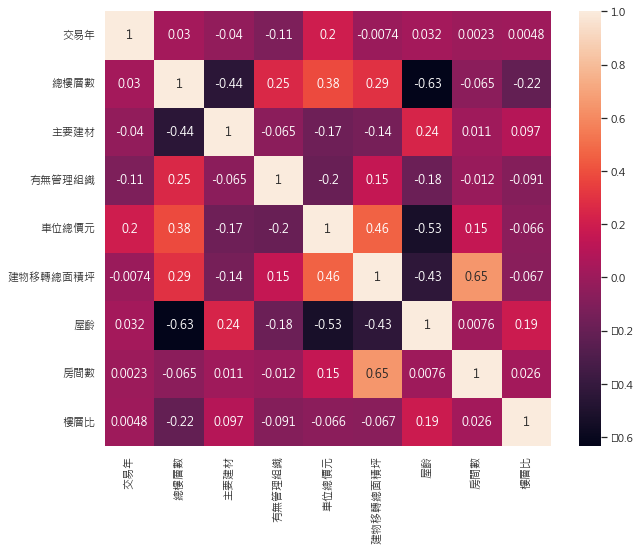

In [201]:
import seaborn as sns
from matplotlib.font_manager import FontProperties
sns.set(font=['sans-serif'])
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})

plt.figure(figsize=(10,8))
sns.heatmap(X.iloc[:,0:9].corr(),annot=True)

In [202]:
X=df_oh.drop(columns=['每坪價格','車位'])
y=df_oh['每坪價格']

## XGBRegressor

In [203]:
# 調參前
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 建立 XGBRegressor 模型
xgbr=xgb.XGBRegressor(tree_method="gpu_hist")
# xgbr=xgb.XGBClassifier(tree_method="auto",enable_categorical=True)
# 使用訓練資料訓練模型
xgbr.fit(X_train,y_train)

y_train_pred = xgbr.predict(X_train)
y_test_pred = xgbr.predict(X_test)

In [204]:
print(f'訓練集RMSE: {(mean_squared_error(y_train, y_train_pred,squared=False)):.3f},測試集: {(mean_squared_error(y_test, y_test_pred,squared=False)):.3f}')
print(f'訓練集MAE: {(mean_absolute_error(y_train, y_train_pred)):.3f},測試集: {(mean_absolute_error(y_test, y_test_pred)):.3f}')
print(f'訓練集R2: {(r2_score(y_train, y_train_pred)):.3f},測試集: {(r2_score(y_test, y_test_pred)):.3f}')

訓練集RMSE: 11.099,測試集: 12.007
訓練集MAE: 7.987,測試集: 8.561
訓練集R2: 0.694,測試集: 0.638


In [ ]:
importance=xgbr.feature_importances_
importance

In [ ]:
X_del=pd.DataFrame({'importance':xgbr.feature_importances_,'features':X.columns}).sort_values(by=['importance'],ascending=False)
mask_selected=X_del.iloc[0:20].features
X_selected=X_train[list(mask_selected)]
X_selected

In [11]:
param_range=np.arange(5,13,2)
train_scores, test_scores = validation_curve(
xgb.XGBRegressor(learning_rate=0.05,tree_method="gpu_hist"), X, y, param_name="max_depth",scoring='r2', param_range=param_range,cv=3, n_jobs=-1)

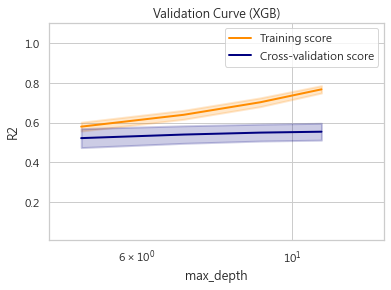

In [12]:
# Generate average scores and standard deviations for more interesting plots
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
# Plot the results
plt.figure()
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)

plt.title("Validation Curve (XGB)")
plt.xlabel("max_depth")
plt.ylabel("R2")
plt.ylim(0.01, 1.1)
plt.xlim(4.5,13.5)
# plt.grid()
plt.legend(loc="best")
plt.show()

In [13]:
param_range=np.arange(0.03,0.2,0.01)
train_scores, test_scores = validation_curve(
xgb.XGBRegressor(max_depth=10,tree_method="gpu_hist"), X, y, param_name="learning_rate",scoring='r2', param_range=param_range,cv=3, n_jobs=-1)

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

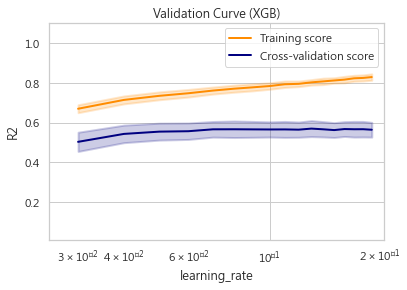

In [16]:
# Generate average scores and standard deviations for more interesting plots
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
# Plot the results
plt.figure()
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)

plt.title("Validation Curve (XGB)")
plt.xlabel("learning_rate")
plt.ylabel("R2")
plt.ylim(0.01, 1.1)
plt.xlim(0.025,0.205)
# plt.grid()
plt.legend(loc="best")
plt.show()

In [ ]:
param_range=np.arange(100,1500,100)
train_scores, test_scores = validation_curve(
xgb.XGBRegressor(max_depth=10,learning_rate=0.05,tree_method="gpu_hist"), X, y, param_name="n_estimators",scoring='r2', param_range=param_range,cv=3, n_jobs=-1)

In [ ]:
# Generate average scores and standard deviations for more interesting plots
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
# Plot the results
plt.figure()
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)

plt.title("Validation Curve (XGB)")
plt.xlabel("learning_rate")
plt.ylabel("R2")
plt.ylim(0.01, 1.1)
plt.xlim(0.025,0.205)
# plt.grid()
plt.legend(loc="best")
plt.show()

In [ ]:
# GridSearch

params = {'learning_rate': [0.03, 0.05, 0.08],
        'max_depth': [8,10,12],
        'min_child_weight': [5],
        'subsample': [0.7],
        'colsample_bytree': [0.5],
        'n_estimators' : [100],
              }

xgbclf = xgb.XGBRegressor(tree_method='gpu_hist',enable_categorical=True)
clf = GridSearchCV(estimator=xgbclf,
                   param_grid=params,
                   n_jobs=-1,
                   cv=3,
                   verbose=1)

clf.fit(X_train, y_train)

print(clf.best_params_,clf.best_score_)

In [191]:
# 調參後
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# scaler = preprocessing.StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)

xgbr1=xgb.XGBRegressor(tree_method="gpu_hist",enable_categorical=True,n_jobs=-1,
                      colsample_bytree=0.5,
                      min_child_weight=5,
                      subsample=0.7,
                      max_depth=10,
                      n_estimators=500,
                      learning_rate=0.03)
# 使用訓練資料訓練模型
xgbr1.fit(X_train,y_train)

# X_test = scaler.transform(X_test)
y_train_pred = xgbr1.predict(X_train)
y_test_pred = xgbr1.predict(X_test)

In [192]:
print(f'訓練集RMSE: {(mean_squared_error(y_train, y_train_pred,squared=False)):.3f},測試集: {(mean_squared_error(y_test, y_test_pred,squared=False)):.3f}')
print(f'訓練集MAE: {(mean_absolute_error(y_train, y_train_pred)):.3f},測試集: {(mean_absolute_error(y_test, y_test_pred)):.3f}')
print(f'訓練集R2: {(r2_score(y_train, y_train_pred)):.3f},測試集: {(r2_score(y_test, y_test_pred)):.3f}')

訓練集RMSE: 9.547,測試集: 11.433
訓練集MAE: 6.762,測試集: 7.994
訓練集R2: 0.773,測試集: 0.673


In [193]:
cv=KFold(n_splits=5, shuffle=True)
score=cross_val_score(xgbr,X,y,cv=cv,scoring='r2',n_jobs=-1)
print(f"CV score = {(score.mean()):.3f}")

CV score = 0.643


In [194]:
# Saving model
with open("model_XGBR_taipei.pickle","wb") as f:
    pickle.dump(xgbr1, f, protocol=pickle.HIGHEST_PROTOCOL)